In [102]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 KB 3.3 MB/s eta 0:00:003.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.1/293.1 KB 3.6 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 KB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 3.4 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━

In [29]:
!pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


In [140]:
pip install --upgrade pillow easyocr opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader

In [4]:
from torchvision import datasets, transforms

In [143]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 14 * 14)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [144]:
model = CNN()

In [145]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [146]:
critetion = nn.CrossEntropyLoss()

In [147]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081))])

In [148]:
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [149]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [96]:
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
        output = model(data)
        loss = critetion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch: {epoch} Loss: {loss.item():4f}")

In [97]:
for (data, target) in train_dataloader:
    saver = data
    # print(target)

In [98]:
for epoch in range(1, 6):
    train(model, train_dataloader, optimizer, criterion, epoch)

Epoch: 1 Loss: 2.315619
Epoch: 1 Loss: 0.168737
Epoch: 1 Loss: 0.157229
Epoch: 1 Loss: 0.080411
Epoch: 1 Loss: 0.067300
Epoch: 1 Loss: 0.128336
Epoch: 1 Loss: 0.037658
Epoch: 1 Loss: 0.007037
Epoch: 1 Loss: 0.035617
Epoch: 1 Loss: 0.004089
Epoch: 2 Loss: 0.029106
Epoch: 2 Loss: 0.012663
Epoch: 2 Loss: 0.012116
Epoch: 2 Loss: 0.060042
Epoch: 2 Loss: 0.011586
Epoch: 2 Loss: 0.022487
Epoch: 2 Loss: 0.045938
Epoch: 2 Loss: 0.005498
Epoch: 2 Loss: 0.028041
Epoch: 2 Loss: 0.008367
Epoch: 3 Loss: 0.172452
Epoch: 3 Loss: 0.079258
Epoch: 3 Loss: 0.018292
Epoch: 3 Loss: 0.058859
Epoch: 3 Loss: 0.005270
Epoch: 3 Loss: 0.007552
Epoch: 3 Loss: 0.013014
Epoch: 3 Loss: 0.023795
Epoch: 3 Loss: 0.017179
Epoch: 3 Loss: 0.011634
Epoch: 4 Loss: 0.066930
Epoch: 4 Loss: 0.007370
Epoch: 4 Loss: 0.005337
Epoch: 4 Loss: 0.000167
Epoch: 4 Loss: 0.016688
Epoch: 4 Loss: 0.014924
Epoch: 4 Loss: 0.048925
Epoch: 4 Loss: 0.000192
Epoch: 4 Loss: 0.022013
Epoch: 4 Loss: 0.003579
Epoch: 5 Loss: 0.006174
Epoch: 5 Loss: 0

In [100]:
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)

    acc = 100. * correct / total
    print(f"Test accuracy: {acc:.2f}%")

In [101]:
test(model, test_dataloader)

Test accuracy: 98.94%


In [3]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [9]:
reader = easyocr.Reader(['ru'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
import os

image_path = "/home/hom1e/codes/olproga/ML/day_2/test/404731715_03.png"
if not os.path.isfile(image_path):
    print(f"Файл не найден: {image_path}")
else:
    print("oke")

oke


/home/hom1e/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Текст: [5) {) 186~ @тл (Точность: 0.10)
Текст: % о?_ (Точность: 0.34)
Текст: ч8 (Точность: 0.35)
Текст: -22 (Точность: 0.22)
Текст: 0л.2 (Точность: 0.17)
Текст: [%&@ -4 (Точность: 0.10)
Текст: [чя &их (Точность: 0.23)
Текст: 9/ 'ж{~' (Точность: 0.10)
Текст: &0_   {жыэ и? (Точность: 0.24)
Текст: #мжо_ (Точность: 0.22)
Текст: ( (Точность: 0.96)
Текст: ~~& (Точность: 0.70)
Текст: &  % &  (Точность: 0.15)
Текст: 'ыэ Зои& (Точность: 0.21)
Текст: 49) м~& ц; (Точность: 0.09)
Текст: 4 (Точность: 0.19)
Текст: [л (Точность: 0.91)
Текст: [ (9 && (Точность: 0.13)
Текст: @, (<_ (Точность: 0.33)
Текст: ' И (Точность: 0.13)
Текст: (УС2 (Точность: 0.10)
Текст: 9ич (Точность: 0.09)
Текст: С (Точность: 0.51)
Текст: (@1 (Точность: 0.22)
Текст: И1 (Точность: 0.34)
Текст: 0л2 (Точность: 0.36)
Текст: @Ы&_.& & (Точность: 0.17)
Текст: +( (Точность: 0.31)
Текст: 8 ~& (Точность: 0.11)
Текст: [. (Точность: 0.44)
Текст: 9И (Точность: 0.50)
Текст: иХ и Ф (Точность: 0.15)
Текст: */ (Точность: 0.92)
Текст: 'И@ 10 (Т

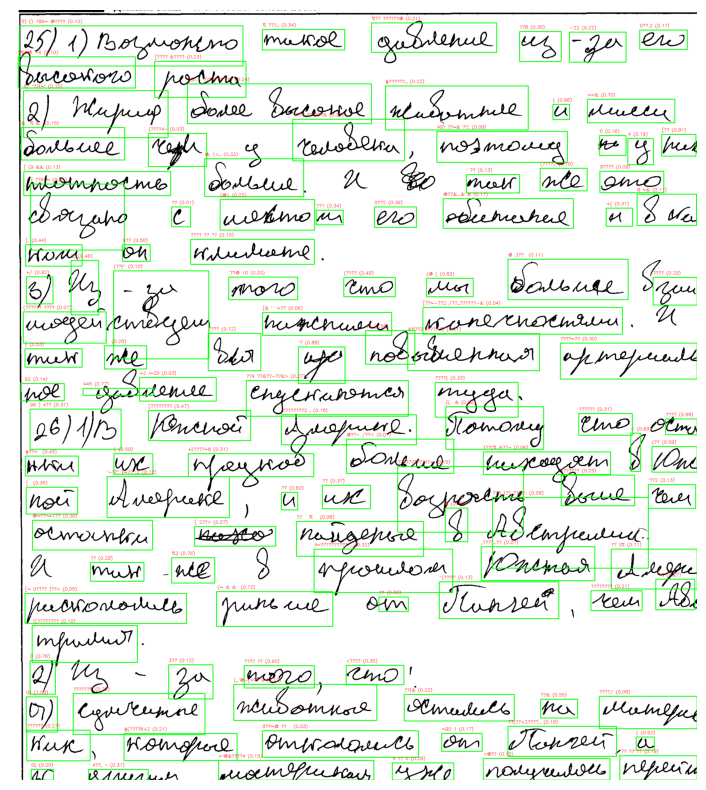

In [ ]:
image_path = "./test/404731715_03.png"

image = cv2.imread(image_path)
results = reader.readtext(image)

output = image.copy()
for (bbox, text, prob) in results:
    print(f"Текст: {text} (Точность: {prob:.2f})")
    
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    
    cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), 2)
    
    cv2.putText(output, f"{text} ({prob:.2f})", 
                (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

plt.figure(figsize=(15, 10))
plt.imshow(output)
plt.axis('off')  # Скрыть оси
plt.show()

In [2]:
import pytesseract
import numpy as np

In [4]:
image_path = "./test/404731715_03.png"
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Изображение не найдено: {image_path}")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

_, thresh = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2, 2), np.uint8)
processed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [6]:
custom_config = r'--oem 3 --psm 6 -l rus'

data = pytesseract.image_to_data(thresh, config=custom_config, output_type=pytesseract.Output.STRING)

text = pytesseract.image_to_string(processed, config=custom_config)
print("Распознанный текст:", text)

Распознанный текст: 257 4) Беичемко мое бобоныл ее лк ле?
дима" До ало,

&) Пр Бешо. Фивьлаой И 92
дов. ук “ розобил, пор ео р
пиров ил ие А 9 оъи 062 орк
о ©  доИле мл Фр роль и би
Колм ОИ И ФУ а

5 № - ие? июл РРР о
ар ры Кое ливлая обида. И
лом 040 рул, ре И, ть
ое роны оное пуда

ре) чье Каз Дел-оня бе бб,
Ид Илофьке и (м ом о.
ОА Чаю? по-рруло $ ели
А пом ме 9 фрочилони Пилиь-х „Дл
емо, кие «в. @и^ Поло” ами 8
раны

р) Сл Е ИТУ
Нок, Колор Фиуромоныйь бл не, 6.
о еее к Ао поч Аи



In [15]:
def draw_text_boxes(image, tesseract_data):
    img_with_boxes = image.copy()
    lines = tesseract_data.strip().split('\n')
    
    for line in lines:
        parts = line.split('\t')
        if len(parts) >= 12:
            try:
                x, y, w, h = int(parts[6]), int(parts[7]), int(parts[8]), int(parts[9])
                text = parts[11]
                conf = int(parts[10])
                
                if conf > 0:
                    cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    cv2.putText(img_with_boxes, f"{text} ({conf}%)", (x, y-10), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            except (ValueError, IndexError):
                continue
    return img_with_boxes


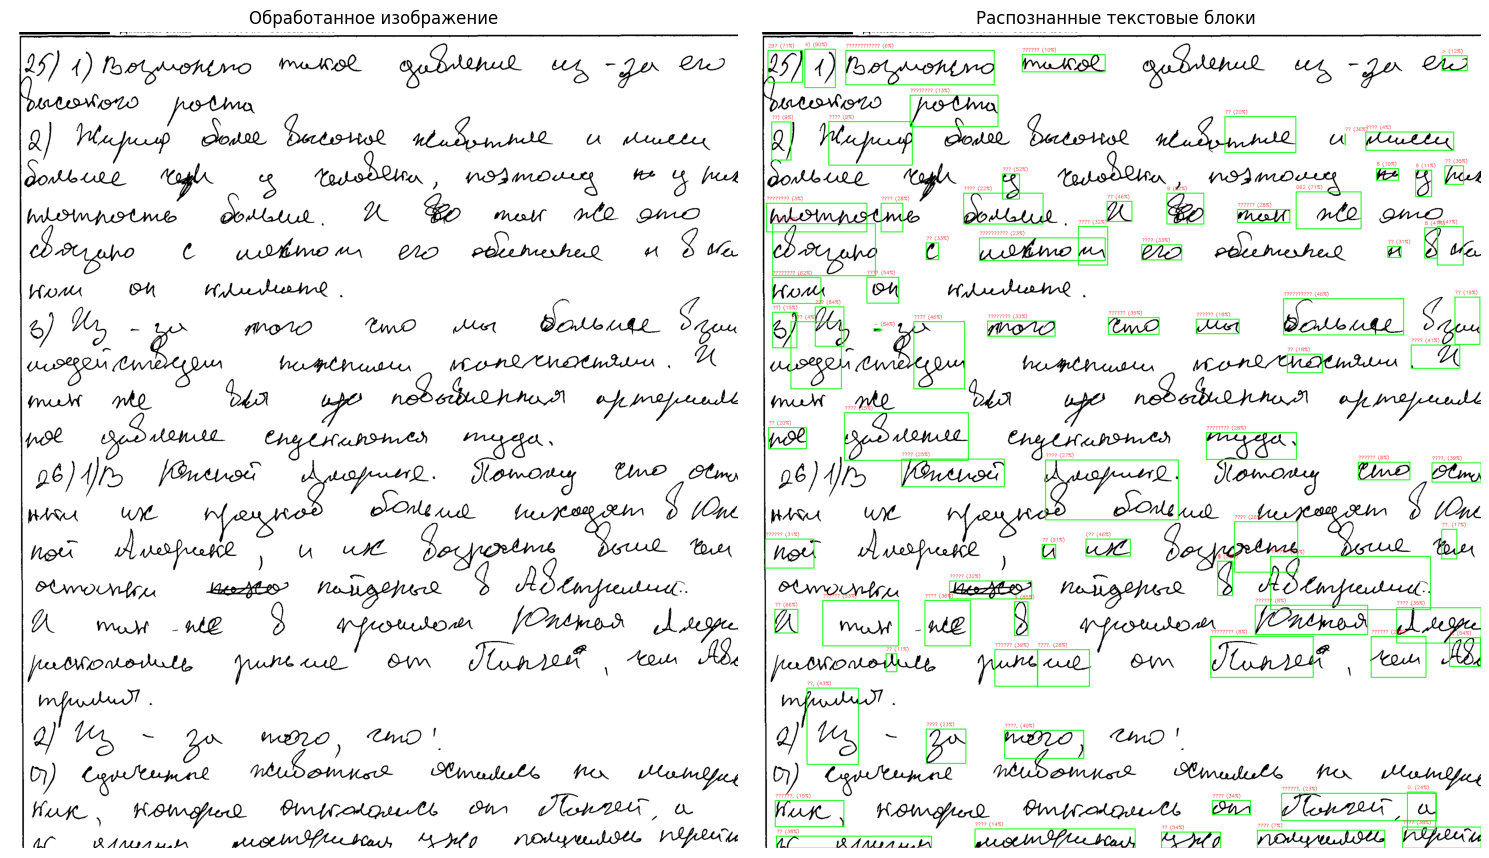

In [16]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
data = pytesseract.image_to_data(thresh, config=custom_config, output_type=pytesseract.Output.STRING)
image_with_boxes = draw_text_boxes(rgb_image, data)


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Обработанное изображение")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_boxes)
plt.title("Распознанные текстовые блоки")
plt.axis('off')

plt.tight_layout()
plt.show()